# <center>Percolation</center>

Percolation is a theory studying the behavior of connected clusters in a random system. It provides insight into a wide range of phenomena, like physics, mathematics and recently epidemiology.

The basic idea is to generate a grid of square sites, where each one of them can be occupied or not with a certain probability $p$. If many sites are occupied next to each other, they form a cluster. With increasing site occupatio probability theese clusters grow larger. At a certain critical probability $p_c$ the cluster spans the entire system. We call this probability the <i>percolation threshold.</i> Mathematically, for infinite 2D system this percolation is equal:

### $$p_c \approx 0.592756$$

In this project we're going to use Monte Carlo techniques to analize phase transistions and clustering at various site occupation probabilities. Let's begin with generating 2D systems.

In [8]:
from ProbabilitySite import ProbabilitySite
from matplotlib import pyplot as plt
%matplotlib inline

The most important parameter to pass into the constructor is system size $L$. Additionally we can pass probability of site occupation, but it is going to be changed many times during the simulation. To generate grid, it uses <i>numpy.random</i> module.

In [3]:
L = 10
probability_site = ProbabilitySite(L=L)

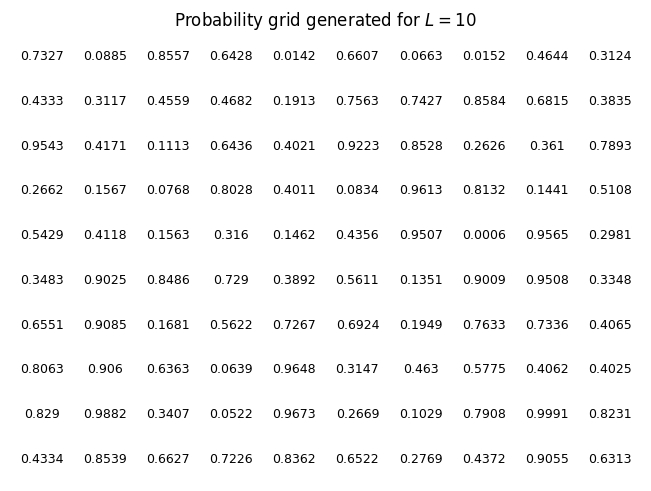

In [4]:
figure, axes = plt.subplots(1, 1, layout='constrained')
axes.set_title(f'Probability grid generated for $L = {L}$')
probability_site.plot_grid_as_matrix(axes=axes)

Now we can pass site probability. Each site above $1 - p$ is going to be occupied, marked as $1$ and the rest of them will be $0$.

In [5]:
probability = 0.6
probability_site.change_probability(probability)
probability_site.grid_thresholding()

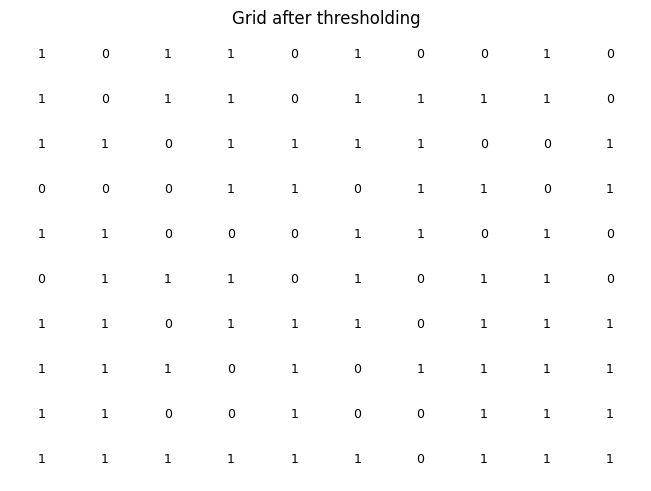

In [6]:
figure2, axes2 = plt.subplots(1, 1, layout='constrained')
axes2.set_title(f'Grid after thresholding')
probability_site.plot_grid_as_matrix(matrix=probability_site.get_current_grid(), axes=axes2)

We can use <i>plt.imshow</i> to visualize generated grid.

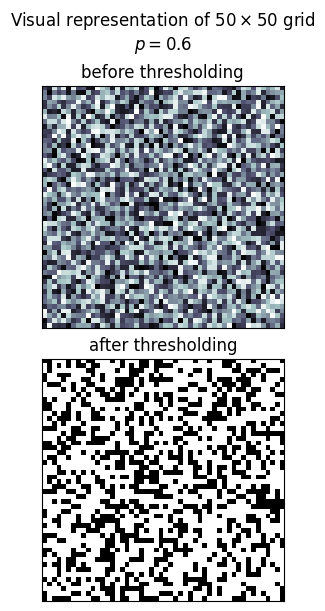

In [7]:
L = 50
probability = 0.6
probability_site = ProbabilitySite(L=L, p=probability)
probability_site.grid_thresholding()

figure3, axes3 = plt.subplots(2, 1, layout='constrained')
figure3.suptitle(f'Visual representation of ${L}' + r'\times' + f'{L}$ grid\n$p = {probability}$')
probability_site.plot_grid(initial=True, ax=axes3[0], title='before thresholding', cmap_name='bone')
probability_site.plot_grid(initial=False, ax=axes3[1], title='after thresholding', cmap_name='bone')
figure3.set_size_inches(3, 6)

Below we can see how thresholded grid changes for different probabilities.

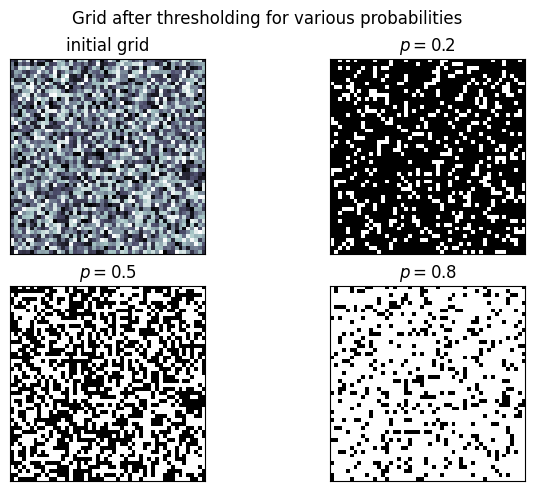

In [12]:
figure4, axes4 = plt.subplots(2, 2, layout='constrained')
axes4 = axes4.ravel()
probabilities = [0.2, 0.5, 0.8]
figure4.suptitle(f'Grid after thresholding for various probabilities')
probability_site.plot_grid(initial=True, ax=axes4[0], title='initial grid', cmap_name='bone')
for index, probability in enumerate(probabilities):
    probability_site.change_probability(probability)
    probability_site.grid_thresholding()
    probability_site.plot_grid(initial=False, ax=axes4[index + 1], title=f'$p = {probability}$')

In [24]:
def plot_thresholded_grid(sites_dictionary, L, p=0.5):
    site = sites_dictionary[L]
    site.change_probability(p)
    site.grid_thresholding()
    figure, axes = plt.subplots(1, 2, layout='constrained')
    figure.suptitle(f'Grid for $L = {L}$ and $p = {p}$')
    site.plot_grid(initial=True, ax=axes[0], title='initial grid', cmap_name='bone')
    site.plot_grid(initial=False, ax=axes[1], title='thresholded grid')

In [14]:
site_dictionary = {
    50: ProbabilitySite(L=50),
    100: ProbabilitySite(L=100),
    150: ProbabilitySite(L=150)
}

In [15]:
import ipywidgets

In [25]:
ipywidgets.interact(plot_thresholded_grid,
                    sites_dictionary=ipywidgets.fixed(site_dictionary),
                    L=[50, 100, 150],
                    p=(0, 1, 0.01))

interactive(children=(Dropdown(description='L', options=(50, 100, 150), value=50), FloatSlider(value=0.5, desc…

<function __main__.plot_thresholded_grid(sites_dictionary, L, p=0.5)>

## <center>Images for larger L</center>

![L300](./images/ProbabilitySiteL300p-0.3-0.5-0.7.png)

![L1000](./images/ProbabilitySiteL1000p-0.4-0.6.png)